# Comparing statsmodels and pymer4 to the casadi approach for Linear Mixed Models

- 1 target
- 1 predictor
- 1 random intercept
- 1 random slope
- 0 "fixed" intercept

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels

In [2]:
# from jmspack.NLTSA import flatten
flatten = lambda l: [item for sublist in l for item in sublist]

In [3]:
import casadi as ca

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
from scipy.stats import linregress
# from statsmodels.regression.linear_model import OLS

In [6]:
from pymer4 import Lmer

In [7]:
# from sklearn.datasets import make_regression
# from sklearn.linear_model import LinearRegression, Lasso

# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split

In [8]:
tmp = os.getcwd()
os.chdir(tmp.split("/playground")[0])

# from romeo.romeo import ROMEO
# from romeo.utils import formula_parser

os.chdir(tmp)

# Statsmodels regularized mixedLM examples

In [9]:
data = sm.datasets.get_rdataset('dietox', 'geepack').data

In [10]:
# data_int = data.interpolate(method="linear", limit_direction="both")

# _ = plt.scatter(data_int["Time"], data_int["Feed"])
# _ = plt.scatter(data["Time"], data["Feed"])

In [11]:
# data=data.dropna()

In [12]:
data.head()

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pig     861 non-null    int64  
 1   Evit    861 non-null    object 
 2   Cu      861 non-null    object 
 3   Litter  861 non-null    int64  
 4   Start   861 non-null    float64
 5   Weight  861 non-null    float64
 6   Feed    789 non-null    float64
 7   Time    861 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 53.9+ KB


In [14]:
# md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
# mdf = md.fit(method=["lbfgs"])
# mdf.summary()

In [15]:
target = "Weight"
fixed_effect = "Time"
grouping_var = "Pig"
random_slope = "Time"

In [16]:
{"target": "Weight",
"fixed_effect": "Time",
"grouping_var": "Pig",
"random_slope": "Time"}

{'target': 'Weight',
 'fixed_effect': 'Time',
 'grouping_var': 'Pig',
 'random_slope': 'Time'}

In [17]:
md = smf.mixedlm(f"{target} ~ {fixed_effect}", 
                 data, 
                 groups=data[grouping_var], 
                 re_formula=f"~{random_slope}"
                )
mdf = md.fit(method=["lbfgs"])
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               6.0372    
Min. group size:   11       Log-Likelihood:      -2217.0475
Max. group size:   12       Converged:           Yes       
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.550 28.603 0.000 14.660 16.817
Time              6.939    0.080 86.925 0.000  6.783  7.095
Group Var        19.503    1.561                           
Group x Time Cov  0.294    0.153                           
Time Var          0.416    0.033                           
===========================================================

"""

In [18]:
mdf.params

Intercept           15.738650
Time                 6.939014
Group Var            3.230482
Group x Time Cov     0.048645
Time Var             0.068922
dtype: float64

In [19]:
mdf.fittedvalues

0       21.957902
1       28.806111
2       35.654320
3       42.502529
4       49.350737
          ...    
856     72.989071
857     80.435264
858     87.881457
859     95.327649
860    102.773842
Length: 861, dtype: float64

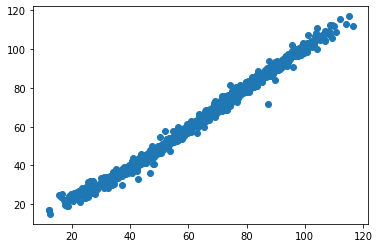

In [20]:
_ = plt.scatter(mdf.fittedvalues, data[target])

In [21]:
mdf.fe_params

Intercept    15.738650
Time          6.939014
dtype: float64

In [22]:
# import re

# formula_string = "Weight ~ Time + (1 + Time | Pig)"

# target = formula_string.replace(" ", "").split("~")[0]
# fixed_effect = formula_string.replace(" ", "").split("~")[1].split("+")[0]
# random_effects = re.findall("\((.*?)\)", formula_string)

# clusters = random_effects[0].replace(" ", "").split("+")[1].split("|")[1]

# {"target": target,
# "fixed_effect": fixed_effect,
# "random_effects": random_effects,
# "clusters": clusters}

# formula_parser(formula_string)

# Pymer4 version

In [23]:
formula_string = f"{target} ~ {fixed_effect} + (1 | {grouping_var}) + (0 + {random_slope} | {grouping_var} )"
formula_string

'Weight ~ Time + (1 | Pig) + (0 + Time | Pig )'

In [24]:
mdp = Lmer(formula=formula_string, data=data, family='gaussian')

In [25]:
mdp.fit(conf_int="profile"#, control="optCtrl = list(ftol_abs=1, xtol_abs=1)"
           )

Formula: Weight~Time+(1|Pig)+(0+Time|Pig)

Family: gaussian	 Inference: parametric

Number of observations: 861	 Groups: {'Pig': 72.0}

Log-likelihood: -2217.348 	 AIC: 4434.696

Random effects:

                 Name     Var    Std
Pig       (Intercept)  19.840  4.454
Pig.1            Time   0.423  0.651
Residual                6.028  2.455

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),15.739,14.645,16.832,0.554,72.050,28.387,0.0,***
Time,6.939,6.780,7.098,0.080,72.078,86.247,0.0,***


In [26]:
mdf.fe_params.to_frame().T

,Intercept,Time
0,15.73865,6.939014


In [27]:
(pd.DataFrame(mdf.random_effects).T.add(mdf.fe_params.values))

,Group,Time
4601,15.109694,6.848209
4602,16.133875,7.364919
4603,17.846672,7.235199
4605,19.771567,7.374041
4641,17.265125,8.143678
...,...,...
8271,14.648598,7.160341
8273,15.533311,7.762129
8437,15.462588,7.070053
8439,16.954404,6.957316


In [28]:
mdp.fixef

,(Intercept),Time
4601,15.110545,6.848259
4602,16.101592,7.368852
4603,17.844617,7.234929
4605,19.778958,7.372111
4641,17.178318,8.154137
...,...,...
8271,14.617425,7.164506
8273,15.460121,7.771321
8437,15.448247,7.071913
8439,16.966371,6.955517


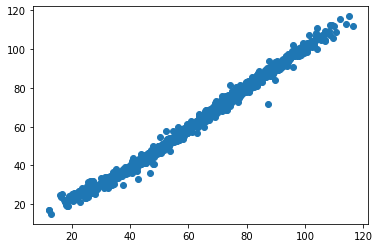

In [29]:
_ = plt.scatter(mdp.fits, data[target])

# LMM equation

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e00ba9a8e13237ca374d55bb3070aebd12a5b8e4" />

In [30]:
y = data[target]
y.head(2)

0    26.50000
1    27.59999
Name: Weight, dtype: float64

In [31]:
x = data[[fixed_effect]]
x.head(2)

,Time
0,1
1,2


In [32]:
x = x.assign(intercept=1).set_index("intercept").reset_index()

In [33]:
u = data[grouping_var].unique()

In [34]:
u

array([4601, 4602, 4603, 4605, 4641, 4643, 4645, 4756, 4757, 4759, 4760,
       4813, 4814, 4815, 4817, 4854, 4856, 4857, 4858, 5389, 5392, 5497,
       5500, 5501, 5502, 5524, 5527, 5528, 5578, 5581, 5582, 5850, 5851,
       5852, 5862, 5865, 5866, 6055, 6056, 6057, 6058, 6207, 6208, 6211,
       6284, 6287, 6288, 6430, 6432, 6433, 6909, 6910, 6912, 8049, 8050,
       8051, 8053, 8139, 8141, 8142, 8144, 8191, 8192, 8193, 8195, 8269,
       8270, 8271, 8273, 8437, 8439, 8442])

In [35]:
len(u)

72

In [36]:
data[grouping_var]

0      4601
1      4601
2      4601
3      4601
4      4601
       ... 
856    8442
857    8442
858    8442
859    8442
860    8442
Name: Pig, Length: 861, dtype: int64

In [37]:
data[grouping_var].value_counts().sort_index()

4601    12
4602    12
4603    12
4605    12
4641    12
        ..
8271    12
8273    12
8437    12
8439    12
8442    12
Name: Pig, Length: 72, dtype: int64

In [38]:
data[grouping_var].value_counts().sort_values()

5528    11
5524    11
5527    11
8141    12
8139    12
        ..
6288    12
8437    12
8439    12
8271    12
4645    12
Name: Pig, Length: 72, dtype: int64

In [39]:
z_list = list()
for cluster_group in u:
    tmp = data.loc[data[grouping_var]==cluster_group, grouping_var]
#     print(cluster_group)

#     np.pad(tmp, (tmp.index.tolist()[0], data[clusters].shape[0] - tmp.index.tolist()[-1]+1))
    
    z_list.append(np.pad(tmp, (tmp.index.tolist()[0], data[grouping_var].shape[0] - tmp.index.tolist()[-1]+1)))

In [40]:
z_list[1].shape

(863,)

In [41]:
possible_Z_df = pd.DataFrame(np.vstack(z_list).T)#.head(50)

In [ ]:
possible_Z_df

In [ ]:
binary_df = np.where(possible_Z_df > 0 , 1, possible_Z_df)

In [ ]:
_ = plt.figure(figsize=(15, 10))
_ = sns.heatmap(binary_df)

In [ ]:
# Z = possible_Z_df.loc[0: 860].values
Z = binary_df[0: 861]

In [ ]:
Z

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e00ba9a8e13237ca374d55bb3070aebd12a5b8e4" />

In [ ]:
x.shape, y.shape

In [ ]:
x.head()

In [ ]:
x.shape

In [ ]:
Z.shape

In [ ]:
y.values.reshape(-1, 1).shape

In [ ]:
data[target] 

In [ ]:
z_list = list()
for cluster_group in u:
    tmp = data.loc[data[grouping_var]==cluster_group, random_slope]
#     print(cluster_group)

#     np.pad(tmp, (tmp.index.tolist()[0], data[clusters].shape[0] - tmp.index.tolist()[-1]+1))
    
    z_list.append(np.pad(tmp, (tmp.index.tolist()[0], data[grouping_var].shape[0] - tmp.index.tolist()[-1]+1)))

In [ ]:
z_list[1].shape

In [ ]:
possible_Z_slope_df = pd.DataFrame(np.vstack(z_list).T)[0: 861]#.head(50)

In [ ]:
Z

In [ ]:
_ = plt.figure(figsize=(15, 10))
_ = sns.heatmap(possible_Z_slope_df)

In [ ]:
Z.shape

In [ ]:
possible_Z_slope_df.values.shape

In [ ]:
# ntheta = x.shape[1]
ntheta_fixed = 2 #(intercept, time,)
ntheta_random = 72 #(amount of pigs groups)
theta_fixed = ca.SX.sym("theta_fixed", ntheta_fixed)
# theta_random = ca.SX.sym("theta_random", ntheta_random)
theta_random = ca.SX.sym("theta_random", ntheta_random*2) # *2 because of random slope of time

alpha=1

model_method = "ols"

In [ ]:
# model_lmm = ca.mtimes(x.values, theta_fixed) + ca.mtimes(Z, theta_random)

In [ ]:
# model_fixed = ca.mtimes(x.values, theta_fixed) + ca.mtimes(Z_random_intercept, theta_random) + ca.mtimes(Z_random_slope, theta_random)

In [ ]:
theta_random[0:ntheta_random].shape

In [ ]:
theta_random[ntheta_random:].shape

In [ ]:
model_lmm = ca.mtimes(x.values, theta_fixed) + ca.mtimes(Z, theta_random[0:ntheta_random]) + ca.mtimes(possible_Z_slope_df.values, theta_random[ntheta_random:])

In [ ]:
# create residual
e = y.values.reshape(-1, 1) - model_lmm

In [ ]:
# ca.vertcat([ntheta_fixed, ntheta_random])
# ca.vertcat(theta_fixed, theta_random)

In [ ]:
# # create residual
# e = y - ca.mtimes(x, theta)


if model_method == "ols":
    # create optimization problem (x: optimization parameter, f: cost function)
    nlp = {"x": ca.vertcat(theta_fixed, theta_random), "f": 0.5 * ca.dot(e, e), }

elif model_method == "lasso":
    # CASE with regularization in cost function (LASSO)
    nlp = {"x": ca.vertcat(theta_fixed, theta_random), "f": 0.5*ca.dot(e, e) + 0.5*alpha*ca.sum1(ca.fabs(theta_fixed))}

else:
    # CASE with regularization in cost function (RIDGE)
    nlp = {"x": ca.vertcat(theta_fixed, theta_random), "f": 0.5*ca.dot(e, e) + 0.5*alpha*ca.dot(theta_fixed, theta_fixed)}

# solve opt
solver = ca.nlpsol("ols", "ipopt", nlp)
# sol = solver(x0=np.zeros(ntheta_fixed + ntheta_random))
sol = solver(x0=np.zeros(ntheta_fixed + ntheta_random*2))

theta_est = sol["x"]

# print(f"theta true: {coef}")
print(f"\ntheta comparison:\n {mdf.params}")
print(f"theta est: {theta_est}")

In [ ]:
results = flatten(theta_est.toarray().tolist())
np.array(results)

In [ ]:
ca_fixef = pd.DataFrame({"(Intercept)": results[1:ntheta_random+1],
              "Time": results[ntheta_random+1:]},
                       index=flatten(data[[grouping_var]].groupby(grouping_var).head(1).values.tolist()))
ca_fixef

In [ ]:
mdp.fixef

In [ ]:
mdf.summary()

In [ ]:
mdp.summary()

In [ ]:
len(Z)

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e00ba9a8e13237ca374d55bb3070aebd12a5b8e4" />

### `y = XB + Z*u + Z_s*u_s + E`

In [ ]:
# x.assign(intercept=1).set_index("intercept").reset_index() * results[0:2]
# x * results[0]
# np.dot(Z, np.repeat(results[1:], repeats=12)[:-3].reshape(1,-1))
Zu = np.dot(Z, results[1:ntheta_random+1])
Z_s_u_s = np.dot(possible_Z_slope_df.values, results[ntheta_random+1:])

In [ ]:
XB = x * results[0]

In [ ]:
fitted_values = XB.add(pd.Series(Zu), axis=0).add(pd.Series(Z_s_u_s), axis=0)

In [ ]:
_ = plt.scatter(mdf.fittedvalues, data[target])

In [ ]:
_ = plt.scatter(mdp.fits, data[target])

In [ ]:
_ = plt.scatter(fitted_values, y)

In [ ]:
_ = plt.scatter(fitted_values, mdf.fittedvalues)

In [ ]:
pred_target_df = pd.concat([fitted_values, y, data[grouping_var]], axis=1).rename(columns={"Time": "fitted", "Weight": "target"})

In [ ]:
pred_target_df.info()

In [ ]:
pred_target_df[grouping_var] = pred_target_df[grouping_var].astype("category")

In [ ]:
_ = sns.scatterplot(data=pred_target_df,
                   x="fitted",
                   y="target",
                   hue="Pig",
                   legend=False)

In [ ]:
# order_of_estimates = fixed_intercept, fixed_coefficients, random_intercept, random_slope

In [ ]:
len(results)

In [ ]:
sol